# <h1><center>**`Machinehack-ML-Merchandise-Popularity-Prediction`**</center></h1>


We need to predict the popularity from all the other data from dataset like Store_Ratio, Basket Ratio, Store Score. 

Big Brands spend a significant amount on popularizing a product.  Nevertheless, their efforts go in vain while establishing the merchandise in the hyperlocal market. Based on different geographical conditions same attributes can communicate a piece of much different information about the customer. Hence, insights this is a must for any brand owner.



### `COLUMNS IN THE DATASET`

storeratio

 basketratio

category1

 storescore

category2

 storepresence

score1 

score2

score3 

score4

time

popularity (Target Column)

### `Importing required libraries`

In [ ]:
# Import all necessary libraries
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from matplotlib import pylab
from pylab import *
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [ ]:
# Load the dataset using pandas
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

In [ ]:
# print train head

train_df.head()


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
# print test head
test_df.head()



,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [ ]:
# Make a copy of the dataset 
df = train_df



# Identifying the number of features or columns

In [ ]:
# Check the shape of train dataset

train_df.shape

(18208, 12)

In [ ]:
# Check the shape of test dataset

test_df.shape

(12140, 11)

# Know all the names of the columns

In [ ]:
# Check the columns in the train dataset
train_df.columns


Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

# More about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

In [ ]:
# Check which columns are having categorical, numerical or boolean values of test dataset
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

# mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [ ]:
# For more information on the test dataset like the total count in all the columns
# min, max values and more information of the respective columns  

test_df.describe()


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
count,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,1.214000e+04
mean,0.543776,0.488879,5.121417,-12.062847,0.642916,0.474675,0.321641,0.165942,0.420485,115.748041,2.154031e+05
std,0.200109,0.301217,3.528765,8.300385,0.479160,0.377582,0.414438,0.139109,0.270508,31.519999,8.231108e+04
min,0.000000,0.000000,0.000000,-46.847000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.406700e+04
25%,0.414750,0.213000,2.000000,-16.066000,0.000000,0.087775,0.000001,0.095900,0.190000,90.908750,1.700000e+05
50%,0.570000,0.521000,5.000000,-9.046500,1.000000,0.430500,0.002050,0.112000,0.392000,114.618500,2.043415e+05
75%,0.696000,0.745000,8.000000,-5.891750,1.000000,0.882000,0.861000,0.173250,0.633000,135.829250,2.445222e+05
max,0.978000,1.000000,11.000000,0.662000,1.000000,0.996000,1.000000,0.994000,1.000000,219.701000,1.782178e+06


# total number of samples in the dataset using the len() function

In [ ]:
# check the lenght of test and train dataset
print('Train data length',len(train_df))
print('Test data length',len(test_df))

Train data length 18208
Test data length 12140


# Counting the total number of missing value

In [ ]:
# Check for missing values in all the columnns of the train dataset
train_df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

There is no missing values in this dataset

In [ ]:
# Check for missing values in all the columnns of the test dataset
test_df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

There is no missing values in this dataset

## Get unique values

In [ ]:
# get unique values in train dataset
for x in train_df.columns:
 

Store_Ratio : 1053
Basket_Ratio : 1993
Category_1 : 12
Store_Score : 10758
Category_2 : 2
Store_Presence : 2832
Score_1 : 3668
Score_2 : 1385
Score_3 : 1591
Score_4 : 12943
time : 12755
popularity : 5


In [ ]:
# get unique values in test dataset
for x in test_df.columns:
  print(x,':',len(test_df[x].unique()))

Store_Ratio : 1010
Basket_Ratio : 1811
Category_1 : 12
Store_Score : 8300
Category_2 : 2
Store_Presence : 2507
Score_1 : 3064
Score_2 : 1275
Score_3 : 1491
Score_4 : 9463
time : 9301


# EDA

# CORRELATION MATRIX



In [ ]:
#correlation 
#perfom correlation matrix Using pandas
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.00,0.47,0.04,0.60,-0.10,-0.47,-0.45,-0.04,0.62,0.12,-0.06,0.23
Basket_Ratio,0.47,1.00,0.05,0.83,-0.11,-0.82,-0.61,0.28,0.53,0.25,0.10,0.20
Category_1,0.04,0.05,1.00,0.04,-0.14,-0.05,-0.03,0.02,0.04,0.00,-0.01,0.00
Store_Score,0.60,0.83,0.04,1.00,-0.09,-0.72,-0.73,0.15,0.52,0.26,0.08,0.20
Category_2,-0.10,-0.11,-0.14,-0.09,1.00,0.10,0.02,-0.04,-0.04,-0.05,-0.01,-0.03
Store_Presence,-0.47,-0.82,-0.05,-0.72,0.10,1.00,0.57,-0.19,-0.43,-0.22,-0.07,-0.20
Score_1,-0.45,-0.61,-0.03,-0.73,0.02,0.57,1.00,-0.10,-0.47,-0.20,-0.11,-0.16
Score_2,-0.04,0.28,0.02,0.15,-0.04,-0.19,-0.10,1.00,0.03,0.02,-0.00,0.00
Score_3,0.62,0.53,0.04,0.52,-0.04,-0.43,-0.47,0.03,1.00,0.18,0.01,0.18
Score_4,0.12,0.25,0.00,0.26,-0.05,-0.22,-0.20,0.02,0.18,1.00,0.03,0.04


** Observations from above correlation matrix**

1. store ratio is strongly correlated with basket ratio , store score, score3 ,store presence score1 , score3
2. basket ratio is correlatd to store score, store presence, score1 score3.
3. category1 is correlated with category2
4. score presence is correlated with score1, score2, score3, popularity
5. score1 is correlated with score3 , score4, time, popularity


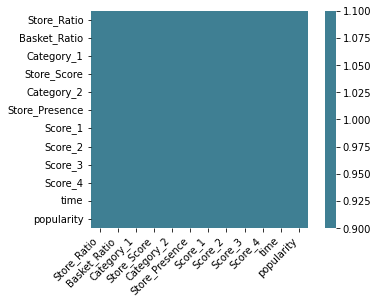

In [ ]:
# Using seaborn
ax = sns.heatmap(corr,vmin=1,vmax=1,center=0,
  cmap=sns.diverging_palette(20,220,n=200),
  square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');


# SCATTER PLOT


In [ ]:
# perform scatterplot 
# Make a list of all the columns of train dataset
# Loop through the different columns 
def plot_scatter(x, y):
  
  # code here
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_df[x],train_df[y])
  plt.show()

  

** Observations from above scatter plot **

1. As value of store presence increases value of basket ratio decreases.
2. As value of store scrore increases value of basket ratio increases.
3. Increase in value of store ratio results in the increase of basket ratio's value

# HISTOGRAM


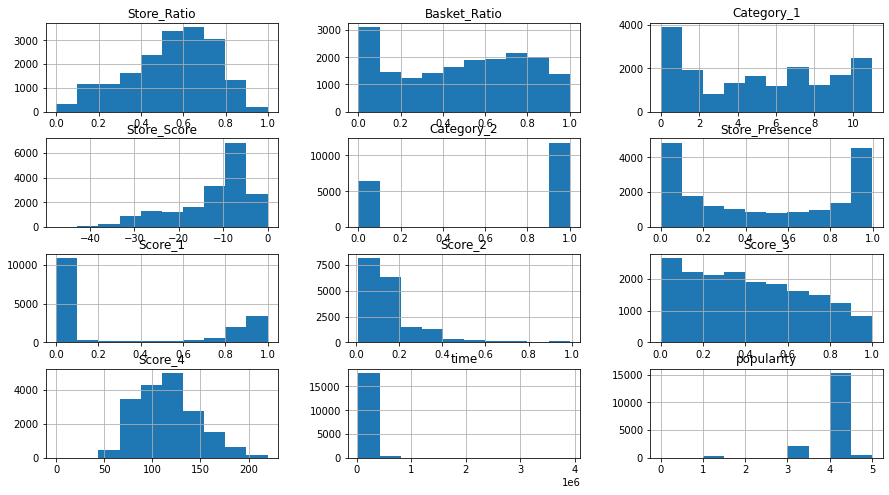

In [ ]:
# perform histogram using pandas for all columns of train dataset
train_df.hist(figsize=(15,8))
plt.show()



**observation from above histogram**
1. The data distribution of store presence is bimodal
2. Score_2, score 1, score3 and time data distribution is skewed left.
3. Store score and popularity data distribution is skewed right.
4. distribution of basket ratio, carwgort 1  is multimodal.
5. distribution of store eatio is bimodal and skewed



# VIF - Variance inflation factor

In [ ]:
#import statsmodel.api
import statsmodels.api as sm


In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_df.drop(['popularity'], axis=1)

# target values
target = train_df['popularity']

# numerical values column names
names = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time']

#print names
print(names)

['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score', 'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'time']


In [ ]:
# droping rows with from new dataframe empty cells
train_for_vif.columns == names[1]

array([False,  True, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Calculating VIF for each feature.

  # taking one column as target variable

  # taking all other remaining columns as fetaure variable

  # firting the OLS model on y and x
 
  # geting the r^2 value of results.

  # calculating vif value

for i in range(0, len(names)):
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  
  model = sm.OLS(y, x)
  
  results = model.fit()
  
  rsq = results.rsquared
  
  vif =round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))
  

R Square value of Store_Ratio columns is 0.91 keeping all other columns as features
Variance inflation Factor of Store_Ratio columns is 11.74 

R Square value of Basket_Ratio columns is 0.92 keeping all other columns as features
Variance inflation Factor of Basket_Ratio columns is 12.13 

R Square value of Category_1 columns is 0.68 keeping all other columns as features
Variance inflation Factor of Category_1 columns is 3.11 

R Square value of Store_Score columns is 0.9 keeping all other columns as features
Variance inflation Factor of Store_Score columns is 9.87 

R Square value of Category_2 columns is 0.65 keeping all other columns as features
Variance inflation Factor of Category_2 columns is 2.83 

R Square value of Store_Presence columns is 0.85 keeping all other columns as features
Variance inflation Factor of Store_Presence columns is 6.69 

R Square value of Score_1 columns is 0.72 keeping all other columns as features
Variance inflation Factor of Score_1 columns is 3.59 

R 

Observations:

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time they all have colinearity with all the variables.

# BOX PLOT

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

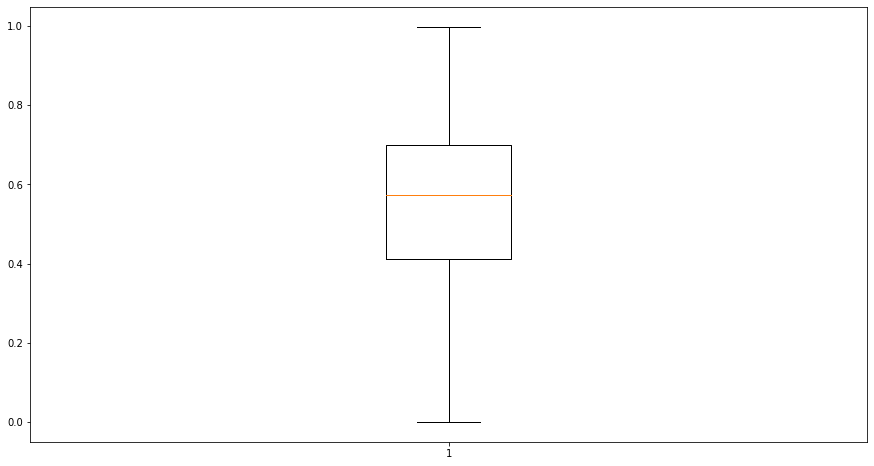

In [ ]:
# Perform a box plot on Store_Ratio 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Store_Ratio'])
plt.show()

from above box plot graph:

Store ratio

1. 25% of  store ratio have value between range 0 to 0.4.

2. 25% of store ratio have value between range 0.4 to 0.6.
3. 25% of store ratio have value between range 0.6 to 0.7.
4. 25% of store ratio have value between range 0.7 to 1.

The mean store ratio is around 6.

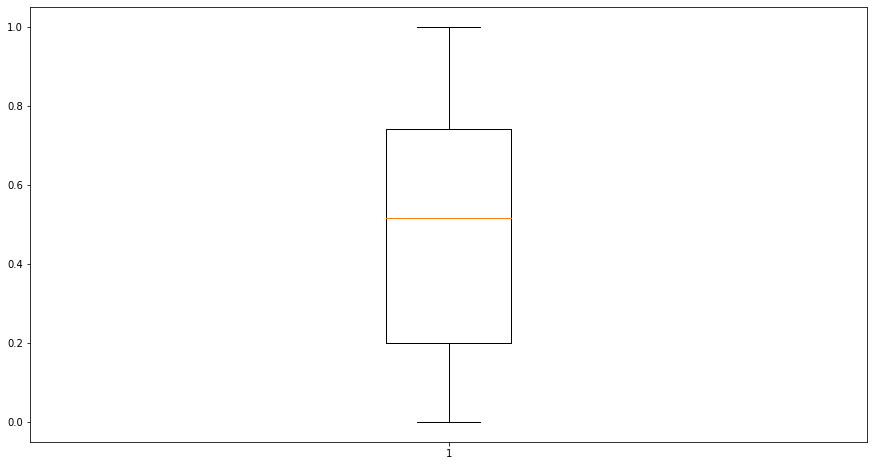

In [ ]:
# Perform a box plot on Basket_Ratio 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Basket_Ratio'])
plt.show()

from above box plot graph:

basket ratio

1. 25% of  basket ratio have value between range 0 to 0.2.
2. 25% of basket ratio have value between range 0.4 to 0.52
3. 25% of basket ratio have value between range 0.52 to 0.78.
4. 25% of basket ratio have value between range 0.78 to 1.

The mean basket ratio is around 0.52

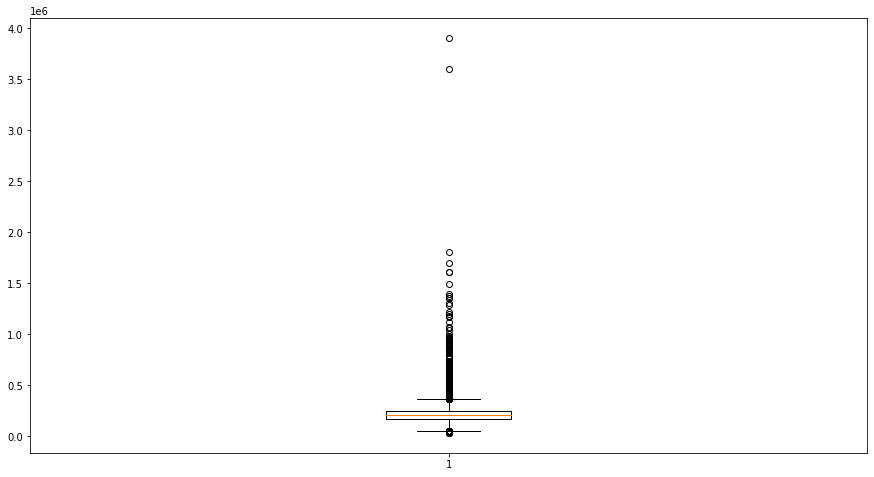

In [ ]:
# Perform a box plot on time
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['time'])
plt.show()

from above box plot graph:

time

1. 25% of  time have value between range 0 to 0.2.

2. 25% of time have value between range 0.2 to 0.25
3. 25% of time have value between range 0.25 to 0.3.
4. 25% of time have value between range 0.3 to 0.4

The mean time is around 0.25

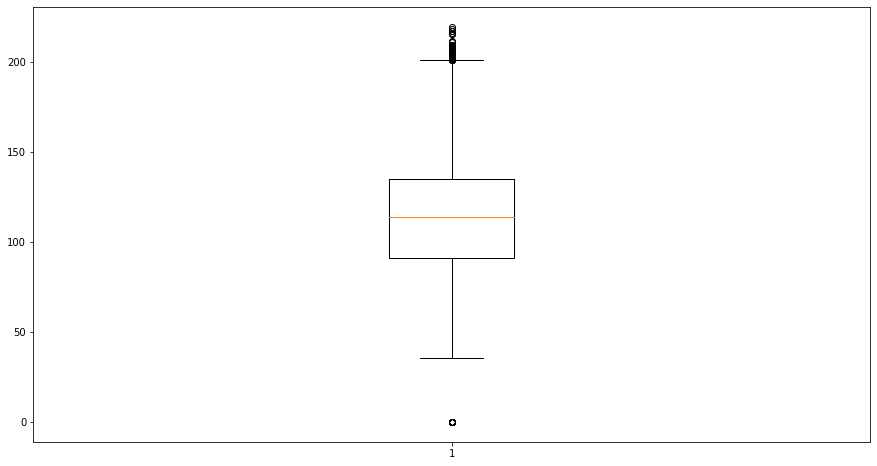

In [ ]:
# Perform a box plot on Score_4 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Score_4'])
plt.show()

from above box plot graph:

score 4

1. 25% of  score 4 have value between range 40 to 90.

2. 25% of score 4 have value between range 90 to 125
3. 25% of score 4 have value between range 125 to 140.
4. 25% of score 4 have value between range 140 to 200.

The mean score 4 is around 125

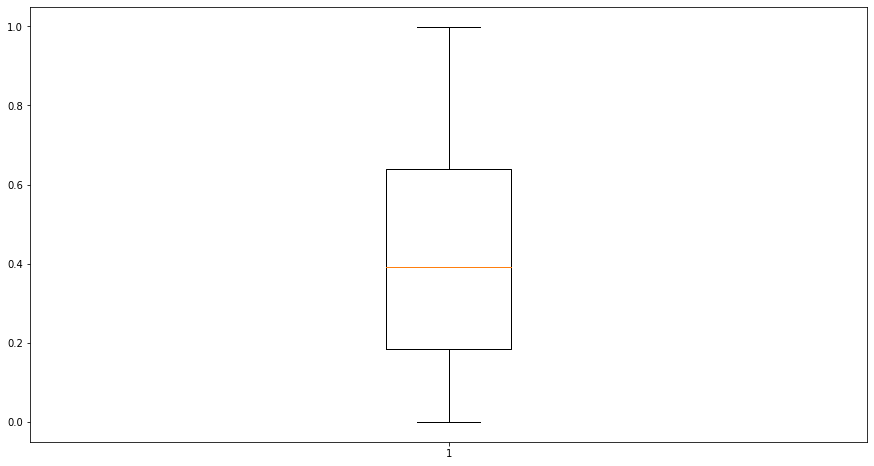

In [ ]:
# Perform a box plot on Score_3 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Score_3'])
plt.show()

from above box plot graph:

score3

1. 25% of  score3 have value between range 0 to 0.2.

2. 25% of score3 have value between range 0.2 to 0.4
3. 25% of score3 have value between range 0.4 to 0.62.
4. 25% of score3 have value between range 0.62 to 1.

The mean score3 is around 0.4

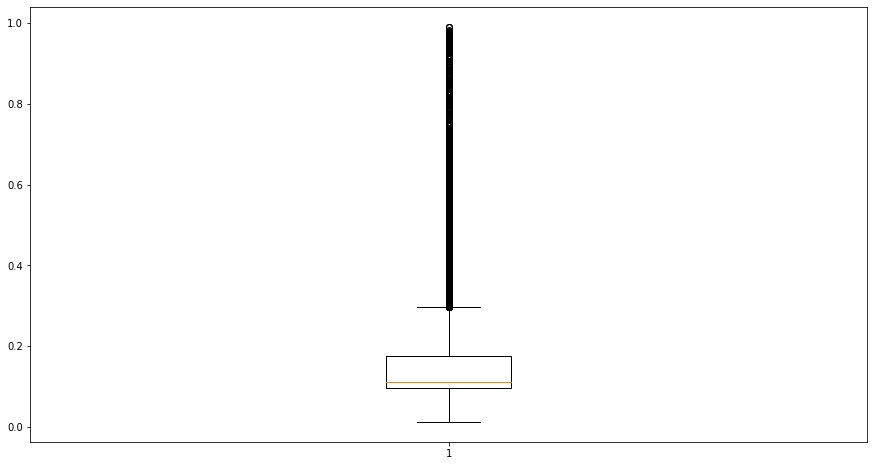

In [ ]:
# Perform a box plot on Score_2 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Score_2'])
plt.show()

from above box plot graph:

score2

1. 25% of  score2 have value between range 0 to 0.1.

2. 25% of score2 have value between range 0.1 to 0.12
3. 25% of score2 have value between range 0.12 to 0.18.
4. 25% of score2 have value between range 0.18 to 1.

The mean score2 is around 0.12

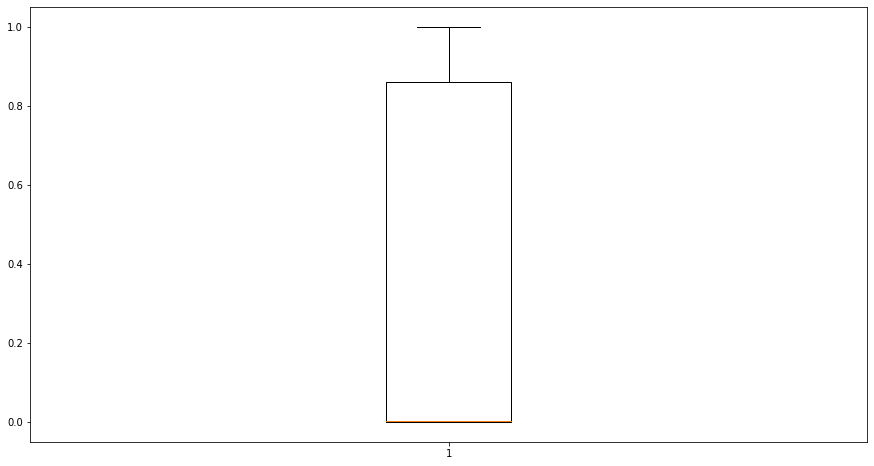

In [ ]:
# Perform a box plot on Score_1 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Score_1'])
plt.show()

from above box plot graph:

score1

1. 25% of  score1 have value between range 0 to 0.0.

2. 25% of score1 have value between range 0.0 to 0.0
3. 25% of score1 have value between range 0.0 to 0.9
4. 25% of score1 have value between range 0.9 to 1.

The mean score1 is around 0.0

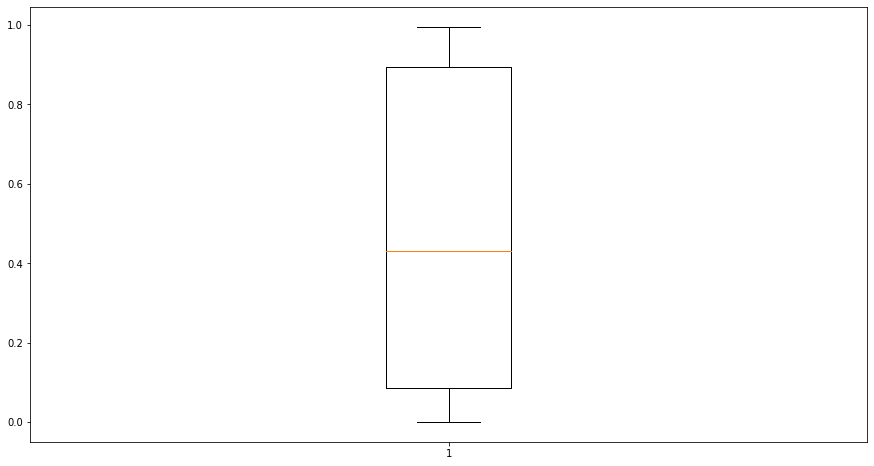

In [ ]:
# Perform a box plot on Store_Presence 
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['Store_Presence'])
plt.show()

from above box plot graph:

store presence

1. 25% of  store presence have value between range 0 to 0.35.

2. 25% of store presence have value between range 0.35 to 0.42
3. 25% of store presence have value between range 0.42 to 0.95.
4. 25% of store presence have value between range 0.95 to 1.

The mean store presence is around 0.42

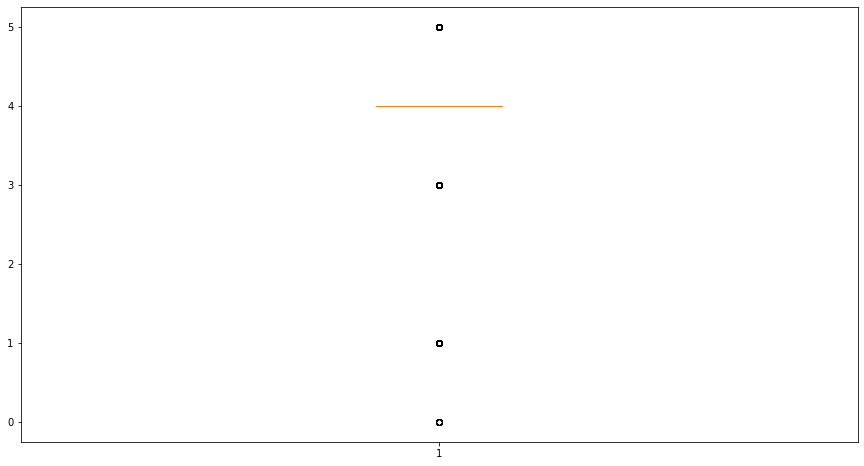

In [ ]:
# Perform a box plot on popularity
plt.figure(figsize=(15,8))
plt.boxplot(x=train_df['popularity'])
plt.show()

# COUNT PLOT
1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


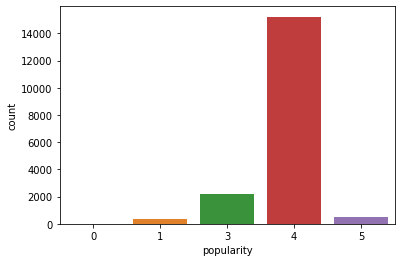

In [ ]:
# Perform the countplot on the popularity
sns.countplot(df.popularity)

From above count plot

we can observe that the dataset is imbalanced.

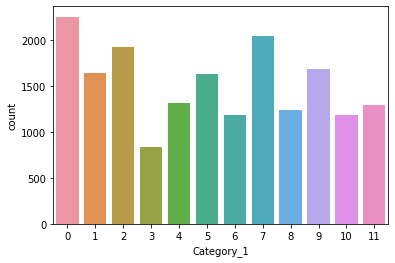

In [ ]:
# Perform the countplot on the category 1
sns.countplot(df.Category_1)


distribution of values over complete dataset is multimodal

# point PLOT

1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

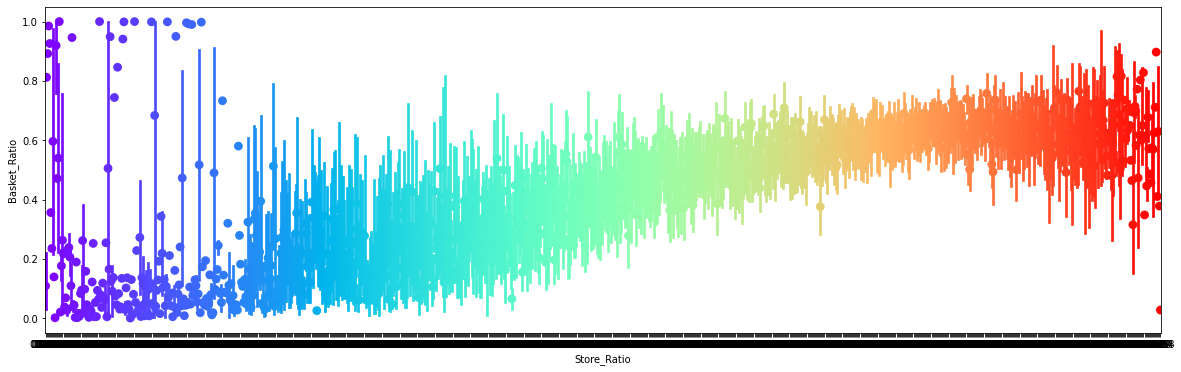

In [ ]:
# Perform point plot between Store Ratio and Basket Ratio
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Basket_Ratio',data=train_df,palette='rainbow')

From above point plot

There is a increase in basket ratio when there is a increase in store ratio. That is both are correlated

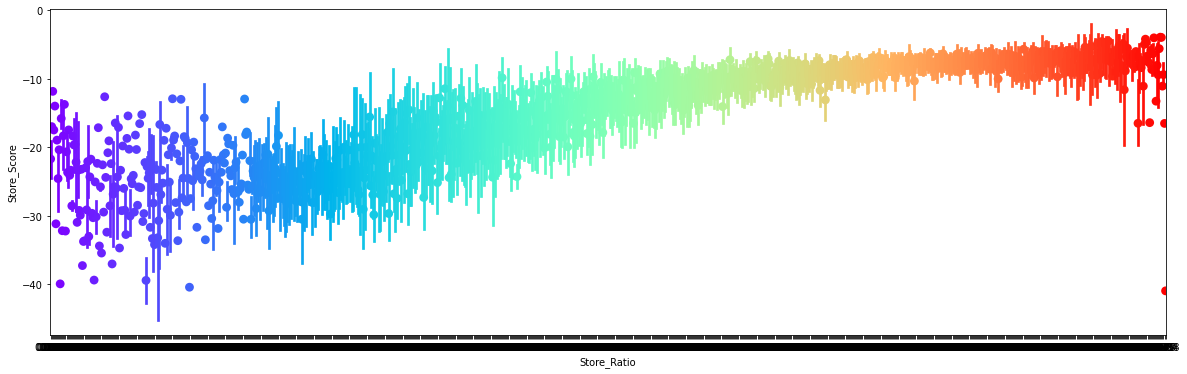

In [ ]:
# Perform point plot between Store Ratio and Store Score
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Store_Score',data=train_df,palette='rainbow')


From above point plot

There is a increase in store score when there is a increase in store ratio. That is both are correlated

increase decrease increase decrease

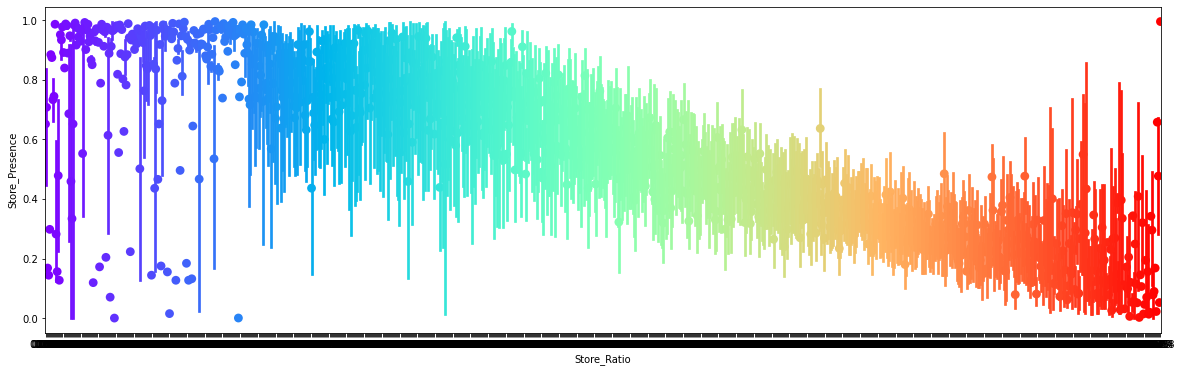

In [ ]:
# Perform point plot between Store Ratio and Store Presence
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Store_Presence',data=train_df,palette='rainbow')

From above point plot

There is a increase in store ratio when there is a decrease in store presence.

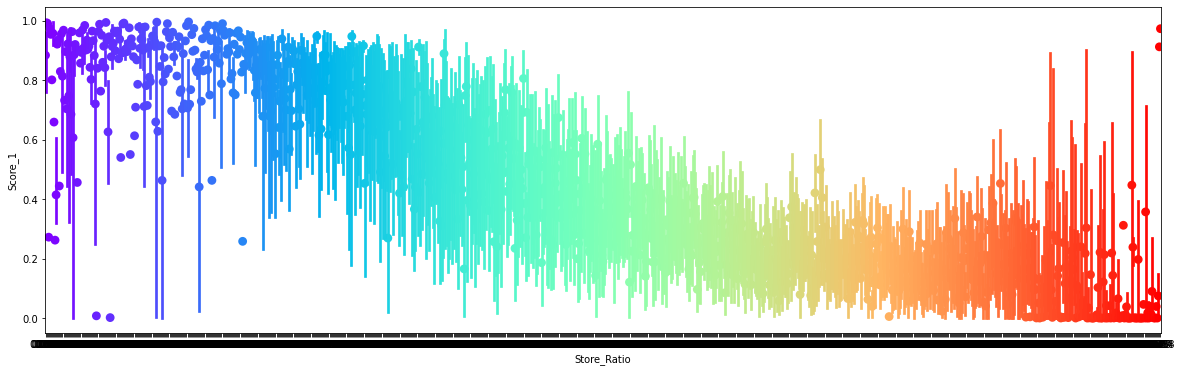

In [ ]:
# Perform point plot between Store Ratio and Score 1
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Score_1',data=train_df,palette='rainbow')

From above point plot

There is a decrease in score3 when there is a increase in store ratio.

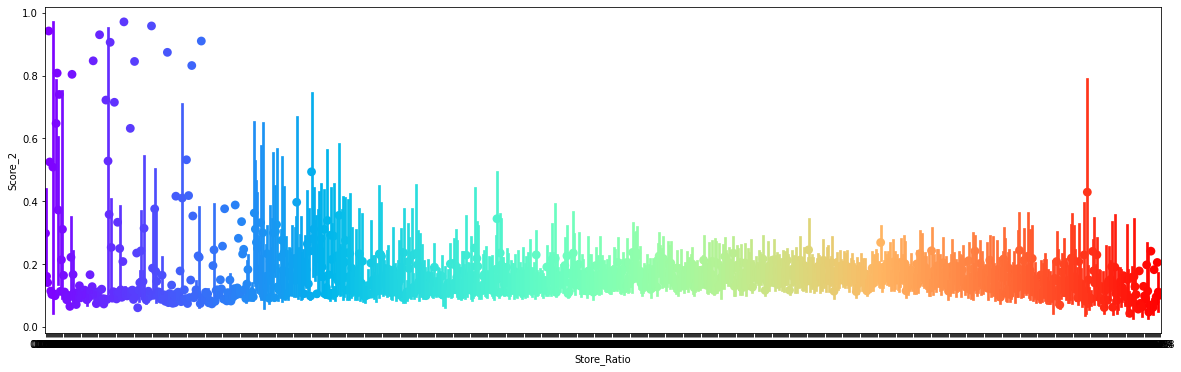

In [ ]:
# Perform point plot between Store Ratio and Score 2 
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Score_2',data=train_df,palette='rainbow')

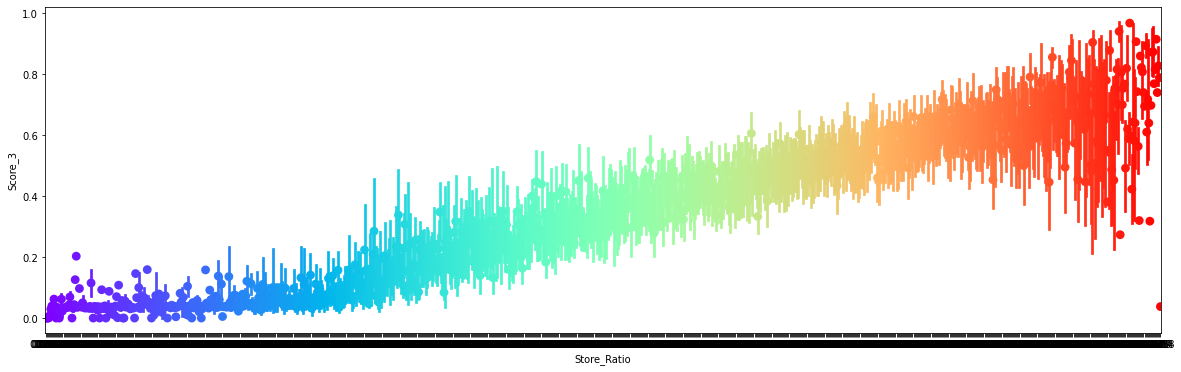

In [ ]:
# Perform point plot between Store ratio and Score 3
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Score_3',data=train_df,palette='rainbow')



From above point plot

There is a increase in store ratio when there is a increase in score3. That is both are correlated

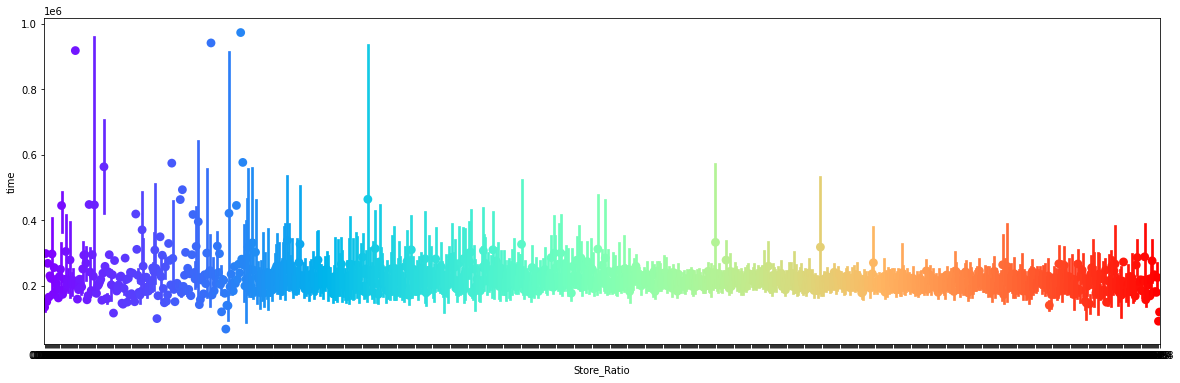

In [ ]:
# Perform point plot between Store Ratio and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='time',data=train_df,palette='rainbow')

From above pointplot

1. Most of the points are between 0.2 to 0.3
2. Very few points above 0.3

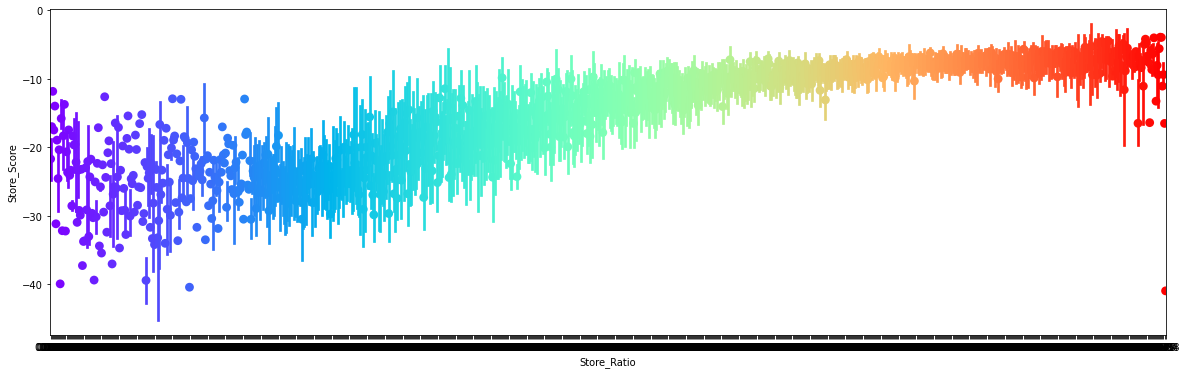

In [ ]:
# Perform point plot between Basket Ratio and Store Score
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio',y='Store_Score',data=train_df,palette='rainbow')

From above point plot

There is a increase in store score when there is a increase in basket ratio. 

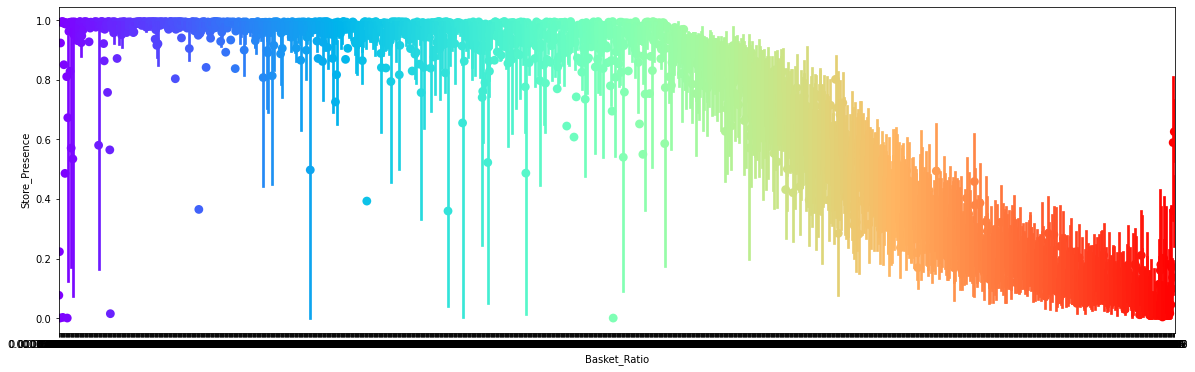

In [ ]:
# Perform point plot between Basket Ratio and Store Presence
plt.figure(figsize=(20,6))
sns.pointplot(x='Basket_Ratio',y='Store_Presence',data=train_df,palette='rainbow')



observation from above point plot 

there is decrease in value on store presence as value of basket ratio is increasing

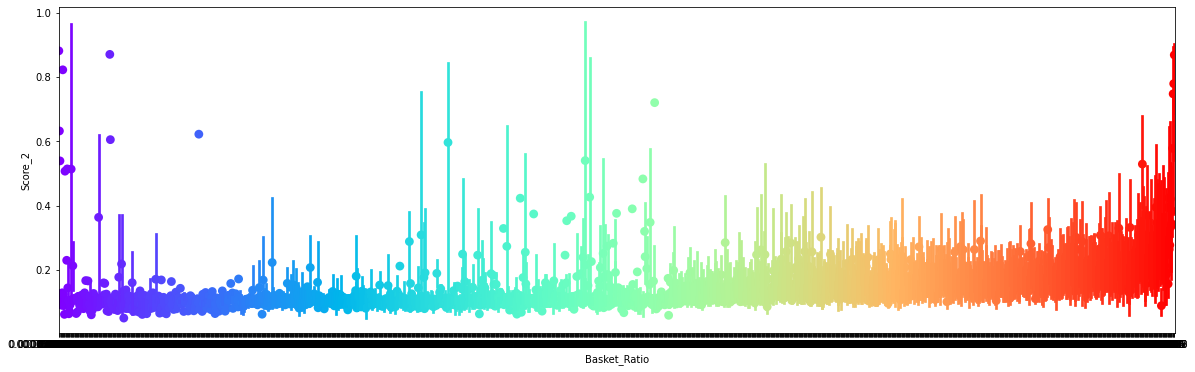

In [ ]:
# Perform point plot between Basket Ratio and Score 2
plt.figure(figsize=(20,6))
sns.pointplot(x='Basket_Ratio',y='Score_2',data=train_df,palette='rainbow')



From above pointplot

1. Most of the points are between 0.0 to 0.2
2. Very few points above 0.2

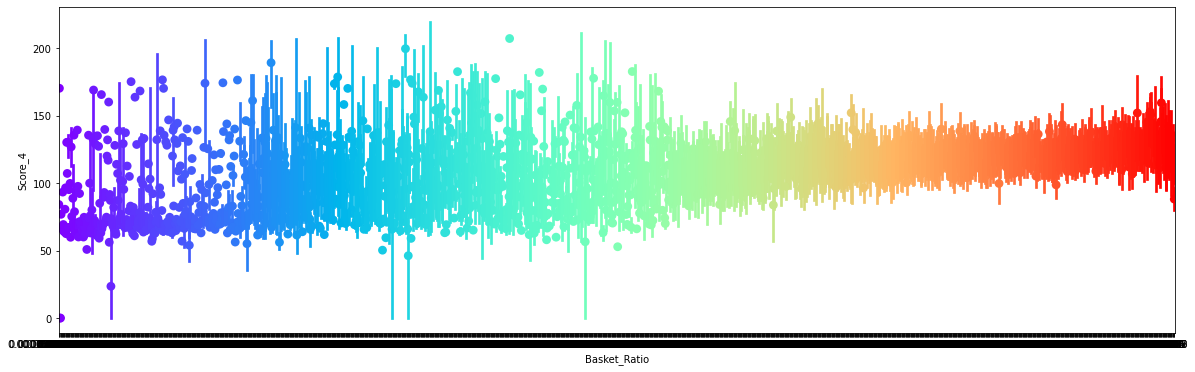

In [ ]:
# Perform point plot between Basket Ratio and Score 4
plt.figure(figsize=(20,6))
sns.pointplot(x='Basket_Ratio',y='Score_4',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 50 to 150

Very few points above 150 and below 50

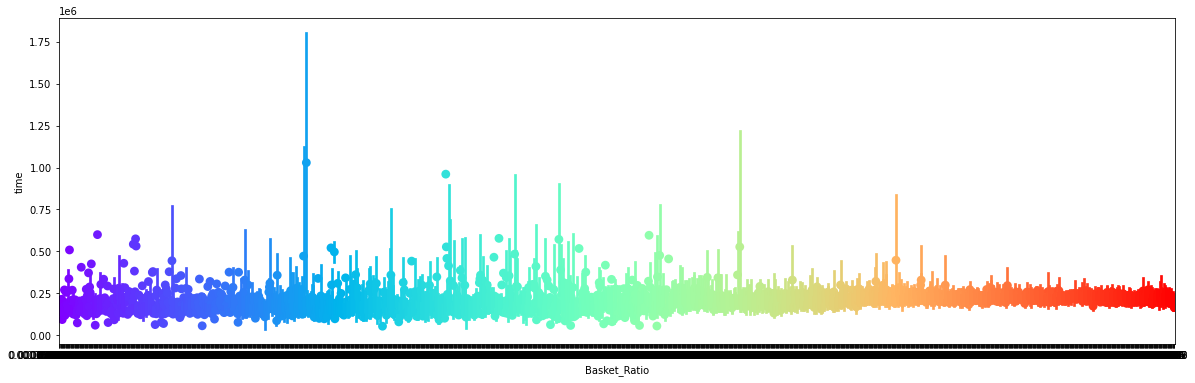

In [ ]:
# Perform point plot between Basket Ratio and Time
plt.figure(figsize=(20,6))
sns.pointplot(x='Basket_Ratio',y='time',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 0.0 to 0.50

Very few points above 0.50



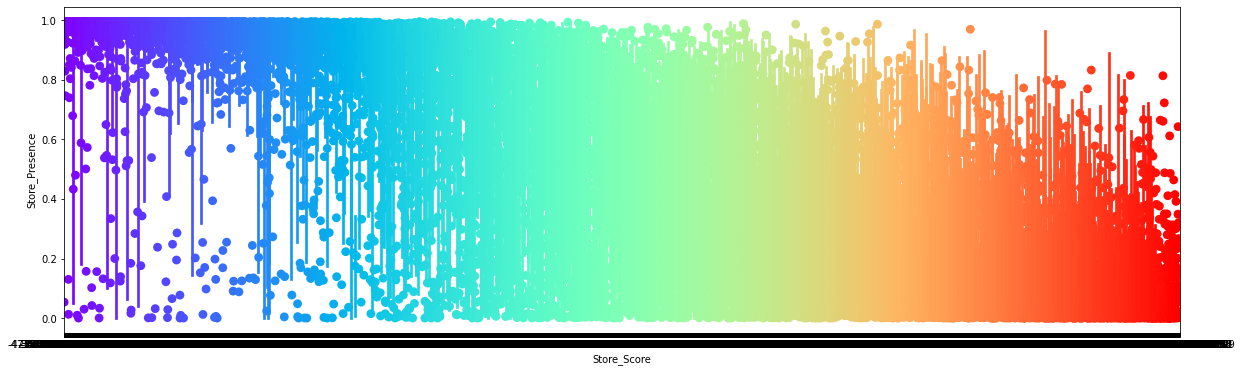

In [ ]:
# Perform point plot between Store Score and Store Presence
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Score',y='Store_Presence',data=train_df,palette='rainbow')

as the value of store score increasing value of store presence decreasing

In [ ]:
# Perform point plot between Store Score and Score 4 
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Score',y='Score_4',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 50 to 200

Very few points above 200 and below 50

In [ ]:
# Perform point plot between Store Score and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Score',y='time',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 0.0 and 0.5

Very few points above 0.5

In [ ]:
# Perform point plot between Store Presence and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Presence',y='time',data=train_df,palette='rainbow')



From above pointplot

Most of the points are between 0.1 and 0.4

Very few points above 0.4 and below 0,1

In [ ]:
# Perform point plot between Store presence and popularity
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Presence',y='popularity',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

In [ ]:
# Perform point plot between Score 1 and score 4
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_1',y='Score_4',data=train_df,palette='rainbow')

From above pointplot

Most of the points are between 75 to 175
Very few points above 175 and below 75

In [ ]:
# Perform point plot between Score 1 and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_1',y='time',data=train_df,palette='rainbow')

From above pointplot

1. Most of the points are between 0.1 to 0.4
2. Very few points above 0.4

In [ ]:
# Perform point plot between Score 2 and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_2',y='time',data=train_df,palette='rainbow')

From above pointplot

1. Most of the points are between 1 to 3

2. Very few points above 3

In [ ]:
# Perform point plot between Score 2 and Score 4
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_2',y='Score_4',data=train_df,palette='rainbow')



From above pointplot

Most of the points are between 75 to 150

Very few points above 150 and below 75

In [ ]:
# Perform point plot between Score 2 and popularity
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_2',y='popularity',data=train_df,palette='rainbow')




From above pointplot

1. Most of the points are around 4
2. few points are between 3 and 4
3. very few are below 3

In [ ]:
# Perform point plot between Score 3 and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_1',y='time',data=train_df,palette='rainbow')





From above pointplot

Most of the points are between o.0 to 0.4

Very few points above 0.4

In [ ]:
# Perform point plot between Score 3 and popularity
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_3',y='popularity',data=train_df,palette='rainbow')




From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

In [ ]:
# Perform point plot between Score 4 and time
plt.figure(figsize=(20,6))
sns.pointplot(x='Score_4',y='time',data=train_df,palette='rainbow')




From above pointplot

1. Most of the points are between o to 0.5
2. Very few points above 0.5

# DISTPLOT



In [ ]:
#Perform distplot for all the columns in dataset
for column in df.columns:
    print(column)
    # code below
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.displot(df[column],ax=ax[0],color='blue')
    sns.displot(df[column],ax=ax[1],color='green')
    plt.show()

OBSERVATIONS
1. distribution of store ratio, store presence, score3 and popularity are right skewed
2. distribution of basket ratio, score2 and time are skewed left
3. distribution of category 1 is multimodal
4. distribution of category2 and score1 are bimodal

# dendrogram



In [ ]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = train_df.dropna()


import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)

corr_condensed = hc.distance.squareform(1-corr)

z = hc.linkage(corr_condensed,method="average")

fig = plt.figure(figsize=(16,10))

dendrogram = hc.dendrogram(z,labels=X.columns,orientation="left",leaf_font_size=16)

plt.show()


strongly correlated variables
1. score3 and store ratio
2. store score and basket ratio
3. score1 and store presence

# Voilin Plot


1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# perform a violin plot between category1 and store score

plt.figure(figsize=(18,6))
sns.violinplot(x='Category_1', y='Store_Score', data=train_df)


there is no relation between store score and category1

In [ ]:
# perform a violin plot between category2 and category1
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Category_1', data=train_df)


there is no relation between  category2 and category1

In [ ]:
# perform a violin plot between categort1 and store prsence
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_1', y='Store_Presence', data=train_df)



there is no relation between  store presence and category1

In [ ]:
plt.figure(figsize=(18,6))
sns.violinplot(x='Store_Presence', y='Category_1', data=train_df)# perform a violin plot between category1 and score1





there is no relation between  score1 and category1

In [ ]:
# perform a violin plot between category2 and score2 
plt.figure(figsize=(18,6))
sns.violinplot(x='Score_1', y='Category_1', data=train_df)



there is no relation between  score2 and category1

In [ ]:
# perform a violin plot between category1 and score3
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_1', y='Score_3', data=train_df)



there is no relation between  score3 and category1

In [ ]:
# perform a violin plot between category1 and time
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_1', y='time', data=train_df)




there is no relation between  time and category1

In [ ]:
# perform a violin plot between popularity and category1
plt.figure(figsize=(18,6))
sns.violinplot(x='popularity', y='Category_1', data=train_df)




there is no relation between  popularity and category1

In [ ]:
# perform a violin plot between category2 and store presence 

plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Store_Presence', data=train_df)




there is no relation between  category2 and store presence

In [ ]:
# perform a violin plot between category2 and score1
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Score_1', data=train_df)




there is no relation between  category2 and score1

In [ ]:
# perform a violin plot between category2 and score2

plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Score_2', data=train_df)



there is no relation between  category2 and score2

In [ ]:
# perform a violin plot between category2 and score3
plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Score_3', data=train_df)



there is no relation between  category2 and score3

In [ ]:
# perform a violin plot between popularity and score4

plt.figure(figsize=(18,6))
sns.violinplot(x='Category_2', y='Score_4', data=train_df)



there is no relation between popularity and score 4

In [ ]:
# perform a violin plot between popularity and time
plt.figure(figsize=(18,6))
sns.violinplot(x='popularity', y='time', data=train_df)

there is on relation between time and popularity

# Preprocessing

In [ ]:
#convert the time column into more columns like hour, month, day, year , minute
train_df['hour'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.hour

train_df['month'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.month

train_df['day'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.day

train_df['year'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.year

train_df['minute'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.minute



In [ ]:
# drop popularity from train_df and name that variable as y

#drop popularity n time from train dataset
y = df['popularity']

train_df = df.drop(['popularity',"time"],1)


# Scaling



## min max scaling




In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar

def scale_data(df,col):
 from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  

  df[col] = scaler.fit_transform(df[col])
   return df

In [ ]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling
col_X = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4']
X = train_df     
X = scale_data(X,col_X)

## Splitting the data into train and test set

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
 X_train.shape, y_train.shape



In [ ]:
# check for nan value in X_train
np.any(np.isnan(X_train))

# Modelling

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Function for calculating all the relevant metrics 
def print_score(m):
    res = classification_report(y_test,m.predict(X_test))
    
    print("Classification Report \n",res)

In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance_df']]\
        .sort_values('feature_importance_df',ascending=False).index[:50]
    
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8,max(6,len(order)*.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature importance',
                  y='columns'
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

 


# LOGISTIC REGRESSION

In [ ]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class = LogisticRegression()


# fitting the model on train data
log_class.fit(X_train,y_train)


# print score of the model
 print_score(log_class)


# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0],X)



# RANDOM FOREST CLASSIFIER

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)


# fitting the model on train data
rf_clf.fit(X_train,y_train)


# print score of the model
print_score(rf_clf)


# visualizing importance of features

fig, ax = visualize_importance(rf_clf.feature_importances_, X)


# ADA BOOST CLASSIFIER

In [ ]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


# Instantiate the model
Ada_clf = AdaBoostClassifier


# fitting the model on train data

Ada_clf.fit(X_train,y_train)


# print score of the model
print_score(Ada_clf)


# visualizing importance of features
fig, ax = visualize_importance(Ada_clf.feature_importances_, X)


# SUPORT VECTOR CLASSIFIER

In [ ]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()



#fit the model on train data
svc.fit(X_train,y_train)
print_score(svc)


# DESISION TREE CLASSICIFIER

In [ ]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier
dt_clf.fit(X_train,y_train)
print_score(dt_clf)
fig, ax = visualize_importance(dt_clf.feature_importances_, X)





# K NEIGHBOUR CLASSIFIER

In [ ]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier
knn_clf.fit(X_train,y_train)
print_score(knn_clf)



# GRADIENT BOOSTING CLASSIFIER

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBR_clf = GradientBoostingClassifier
GBR_clf.fit(X_train,y_train)
print_score(GBR_clf)
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)

# BAGGING CLASSIFIER

In [ ]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier
bg_clf.fit(X_train,y_train)
print_score(bg_clf)

# VOTING CLASSIFIER

In [ ]:
%%time
# Fit a VotingClassifier model to the train dataset

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

# list of classifier objects
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]

# Instantiate the model
voting_clf = VotingClassifier
voting_clf.fit(X_train,y_train)
print_score(voting_clf)


# XGB CLASSIFIER

In [ ]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier
xgb_clf.fit(X_train,y_train)
print_score(xgb_clf)
fig, ax = visualize_importance(xgb_clf.feature_importances_, X)



## Comparing all the model based on metric

In [ ]:
# import metrics, train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklern.model_selection import train_test_split
    
    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =model.predict(X_test)  
      res = Classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")
    

In [ ]:
# list of model objects
models= [log_class,rf_clf,Ada_clf,svc, dt_clf, knn_clf, GBR_clf,bg_clf, voting_clf, xgb_clf ]
# list of model names
names = ['logistic', 'rf','AdaBoost', 'svc', 'Dtree','KNN','GBR','bagging','voting','XGB']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)



# Hyperparameter tuning




# grid search



In [ ]:
%%time
# Helper function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
  from sklearn.model_selection import GridSearchCV, train_test_split
  from sklearn.model_selection import KFold
  from sklearn.model_selection import GridSearchCV

  
  cv =KFold(n_splits=5,shuffle=False,random_state=None)

  clf =GridSearchCV(model,grid,cv=cv,n_jobs=-1,scoring='f1_marco')
  clf.fit(X_train,y_train)
  
  print (clf.score(X_train,y_train))
  print(clf.best_params_)
 
 

In [ ]:
%%time
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    
grid_search(log_class,log_para_grid)



# NOTE : we can use any one of RandomizedSearchCv or GridSearchCV, both works fine.

# RamdomizedSearchCV

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,random_state=42)
  
  #fit on train
random.fit(X_train,y_train)
  # print best_params_
 print(random.best_params_) 
  

In [ ]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train,y_train,param_grid=rf_para_grid)



In [ ]:
%%time
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,351, 50)], 
 'learning_rate' : [0.01, 0.1, 0.2],
 'max_depth': [x for x in range(5,7)], 
 'min_samples_split': [x for x in range(2,6)]
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingClassifier(),X_train,y_train,param_grid=GBR_para_grid)





In [ ]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(KNeighborsClassifier(),X_train,y_train,param_grid=knn_para_grid)




In [ ]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeClassifier(),X_train,y_train,param_grid=DTR_para_grid)




In [ ]:
%%time
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(AdaBoostClassifier(),X_train,y_train,param_grid=Ada_para_grid)



In [ ]:
%%time
# create  parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.3, 0.4] }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBClassifier(),X_train,y_train,param_grid=XGB_para_grid)


# Using the tuned parameters and training the models

## Gradient Boosting Classifier

In [ ]:
%%time

# Instantiate the model
GBR_clf = GradientBoostingClassifier(**{'n_estimators':300,"min_samples_split":5,'max_depth':6,"learning_rate":0.2})
GBR_clf.fit(X_train,y_train)
print_score(GBR_clf)
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



## Random Forest Classifier

In [ ]:
%%time

# Instantiate the model

rf_clf = RandomForestClassifier(**{'n_estimators':200,"min_samples_split":2,'max_depth':6,"learning_rate":0.2})
rf_clf.fit(X_train,y_train)
print_score(rf_clf)
fig, ax = visualize_importance(rf_clf.feature_importances_, X)



## Adaboost Classifier

In [ ]:
%%time

# Instantiate the model
Ada_clf = AdaBoostClassifier(**{'n_estimators':100,"learning_rate":0.01})
Ada_clf.fit(X_train,y_train)
print_score(Ada_clf)
fig, ax = visualize_importance(Ada_clf.feature_importances_, X)

### Now working with the test dataset provided

In [ ]:
# preparing test data as similarly as done for train data before.



test_df['hour'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.hour

test_df['month'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.month

test_df['day'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.day

test_df['year'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.year

test_df['minute'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.minute
test_df = test_df.drop(["time"],1) 


In [ ]:
X_test = test_df

In [ ]:
# check columns of test data
X_test.columns


In [ ]:
# passing test data for scaling
col_X_test = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4']
X_test = scale_data(X_test,col_X_test)



In [ ]:
# Perforn the prediction on the test dataset
y_predicted = voting_clf.predict(X_test)
y_predicted



In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)


In [ ]:
# predicted values in dataframe

predictions.head()

### CONCLUSION

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.
store ratio is most important data in the dataset.
we used  voting classifier for prediction